In [1]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

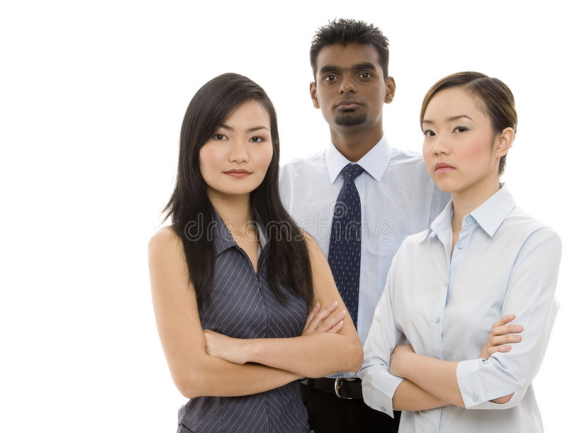

In [20]:
# A function for plotting the images


def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('d.jpg')

# Converting BGR image into a RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plotting the original image
plotImages(image)

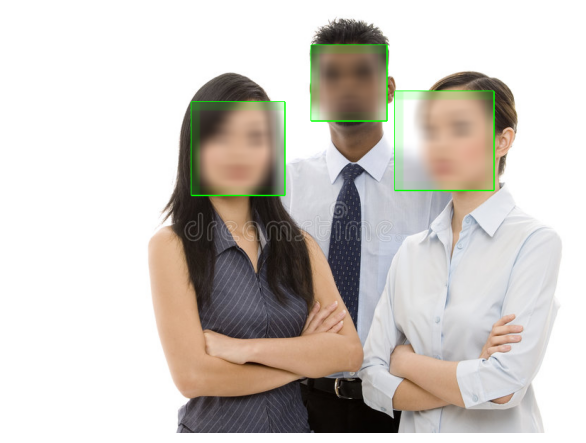

In [21]:
face_detect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_data = face_detect.detectMultiScale(image, 1.3, 5)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = image[y:y+h, x:x+w]
    # applying a gaussian blur over this new rectangle area
    roi = cv2.GaussianBlur(roi, (23, 23), 30)
    # impose this blurred image on original image to get final image
    image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi


# Display the output
plotImages(image)